# Data Preprocessing: 
- ##  Clean and preprocess the raw data to handle noise, missing values, and time synchronization issues.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast 

In [2]:
## Loading the Dataset 
df = pd.read_csv('WCR_tws.csv')
df.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,2025-02-10 08:25:51,ARNETHA,101/102,Reverse,"0,0,0,0,0,0,0,0,0,0,0.0","0.0,31.5,70.5,90.0,99.0,103.5,106.5,108.0,108....","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0.0,106.5,105.0,103.5,103.5,103.5,103.5,105.0,...",TWS,TWS,100,100
1,2025-02-10 08:25:59,ARNETHA,101/102,Normal,"0,4.7,4.7,3.7,3,2.6,2.2,2,1.9,1.8,1.8,1.9,2,2....","0.0,90.0,88.5,97.5,103.5,106.5,108.0,109.5,111...","0.0,4.2,4.3,3.4,2.8,2.4,2.1,1.9,1.9,1.8,1.8,1....","0.0,30.0,63.0,85.5,96.0,103.5,106.5,109.5,111....",TWS,TWS,100,100
2,2024-08-10 06:51:04,ARNETHA,101/102,Reverse,"0.0,1.4,4.5,3.9,3.2,2.7,2.4,2.2,2.1,2.1,2,2.1,...","0.0,58.5,81.0,93.0,99.0,102.0,103.5,103.5,103....","0,5,4.5,3.5,2.8,2.4,2.1,2,2,2.1,2.3,2.4,2.5,2....","0.0,99.0,97.5,96.0,94.5,94.5,96.0,99.0,100.5,1...",TWS,TWS,100,100
3,2024-08-10 06:51:17,ARNETHA,101/102,Normal,"0,4.2,4.9,4,3.2,2.8,2.4,2.2,2.1,2,1.9,1.9,1.9,...","0.0,88.5,82.5,90.0,96.0,100.5,102.0,103.5,105....","0.0,2.9,4.4,3.6,2.9,2.5,2.2,2,1.9,1.8,1.8,1.8,...","0.0,21.0,51.0,76.5,90.0,97.5,102.0,103.5,105.0...",TWS,TWS,100,100
4,2024-08-11 12:08:18,ARNETHA,101/102,Reverse,"0.0,4.2,4.2,3.4,2.9,2.5,2.2,2.1,2,2,2,2.1,2.1,...","0.0,52.5,78.0,91.5,97.5,100.5,103.5,103.5,103....","0,5,4.1,3.3,2.7,2.3,2.1,2,2,2.1,2.2,2.4,2.5,2....","0.0,100.5,99.0,97.5,96.0,96.0,97.5,100.5,100.5...",TWS,TWS,100,100


In [3]:
df.shape

(1385, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Time                1385 non-null   object
 1   Site Name           1385 non-null   object
 2   Point Machine Name  1385 non-null   object
 3   Direction           1385 non-null   object
 4   A Current           1374 non-null   object
 5   A Voltage           1372 non-null   object
 6   B Current           1373 non-null   object
 7   B Voltage           1370 non-null   object
 8   Type of A           1385 non-null   object
 9   Type of B           1385 non-null   object
 10  Polling of A        1385 non-null   int64 
 11  Polling of B        1385 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 130.0+ KB


In [5]:
# First let's see what the raw data looks like
array_columns = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

for col in array_columns:
    print(f"\nColumn: {col}")
    print("Sample values:")
    for val in df[col].head():
        print(f"Type: {type(val)}, Value: {val}")


Column: A Current
Sample values:
Type: <class 'str'>, Value: 0,0,0,0,0,0,0,0,0,0,0.0
Type: <class 'str'>, Value: 0,4.7,4.7,3.7,3,2.6,2.2,2,1.9,1.8,1.8,1.9,2,2.2,2.4,2.6,2.7,2.8,2.9,2.9,3,2.9,2.6,2.2,2,1.9,1.9,1.9,1.9,1.8,1.5,0.7,0.0
Type: <class 'str'>, Value: 0.0,1.4,4.5,3.9,3.2,2.7,2.4,2.2,2.1,2.1,2,2.1,2.1,2.1,2.4,2.6,2.9,3,3.2,3.4,3.6,3.7,3.8,3.9,3.9,3.9,3.9,3.9,3.9,3.9,4,4,3.9,3.9,3.9,3.8,3.5,3.2,3,2.7,1.7,0.0
Type: <class 'str'>, Value: 0,4.2,4.9,4,3.2,2.8,2.4,2.2,2.1,2,1.9,1.9,1.9,1.9,2,2.1,2.3,2.4,2.4,2.3,2.1,1.9,1.9,2,2.1,2.2,2.3,2.3,2.4,2.3,2.2,1.9,0.9,0.0
Type: <class 'str'>, Value: 0.0,4.2,4.2,3.4,2.9,2.5,2.2,2.1,2,2,2,2.1,2.1,2.3,2.6,2.8,3,3.2,3.4,3.5,3.6,3.7,3.7,3.8,3.8,3.7,3.7,3.7,3.7,3.7,3.7,3.6,3.6,3.7,3.6,3.3,3,2.8,2.6,2.7,0.0

Column: A Voltage
Sample values:
Type: <class 'str'>, Value: 0.0,31.5,70.5,90.0,99.0,103.5,106.5,108.0,108.0,108.0,108.0,0.0
Type: <class 'str'>, Value: 0.0,90.0,88.5,97.5,103.5,106.5,108.0,109.5,111.0,111.0,111.0,111.0,109.5,108.0,106.5,105.0

## Converting comma-separated strings to arrays 

In [6]:
# Safely convert string to list
def safe_parse_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x

In [7]:
# Standardize function: exactly 1 leading and 3 trailing 0.0s
def standardize_signal(x):
    if not isinstance(x, list):
        return x

    # Ensure exactly 1 leading 0.0
    if len(x) == 0 or x[0] != 0.0:
        x = [0.0] + [i for i in x if i != 0.0 or x.index(i) != 0]  # remove extra 0s at the beginning if needed
    else:
        # Remove extra leading 0.0s (if more than one)
        while len(x) > 1 and x[1] == 0.0:
            x.pop(1)

    # Ensure exactly 3 trailing 0.0s
    trailing = 0
    for val in reversed(x):
        if val == 0.0:
            trailing += 1
        else:
            break

    if trailing > 3:
        x = x[:len(x) - (trailing - 3)]
    elif trailing < 3:
        x += [0.0] * (3 - trailing)

    return x

In [ ]:
# Apply parsing and standardization
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    df[col] = df[col].apply(safe_parse_list)
    df[col] = df[col].apply(standardize_signal)


In [10]:
df.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,2025-02-10 08:25:51,ARNETHA,101/102,Reverse,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0)","(0.0, 31.5, 70.5, 90.0, 99.0, 103.5, 106.5, 10...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(0.0, 106.5, 105.0, 103.5, 103.5, 103.5, 103.5...",TWS,TWS,100,100
1,2025-02-10 08:25:59,ARNETHA,101/102,Normal,"(0, 4.7, 4.7, 3.7, 3, 2.6, 2.2, 2, 1.9, 1.8, 1...","(0.0, 90.0, 88.5, 97.5, 103.5, 106.5, 108.0, 1...","(0.0, 4.2, 4.3, 3.4, 2.8, 2.4, 2.1, 1.9, 1.9, ...","(0.0, 30.0, 63.0, 85.5, 96.0, 103.5, 106.5, 10...",TWS,TWS,100,100
2,2024-08-10 06:51:04,ARNETHA,101/102,Reverse,"(0.0, 1.4, 4.5, 3.9, 3.2, 2.7, 2.4, 2.2, 2.1, ...","(0.0, 58.5, 81.0, 93.0, 99.0, 102.0, 103.5, 10...","(0, 5, 4.5, 3.5, 2.8, 2.4, 2.1, 2, 2, 2.1, 2.3...","(0.0, 99.0, 97.5, 96.0, 94.5, 94.5, 96.0, 99.0...",TWS,TWS,100,100
3,2024-08-10 06:51:17,ARNETHA,101/102,Normal,"(0, 4.2, 4.9, 4, 3.2, 2.8, 2.4, 2.2, 2.1, 2, 1...","(0.0, 88.5, 82.5, 90.0, 96.0, 100.5, 102.0, 10...","(0.0, 2.9, 4.4, 3.6, 2.9, 2.5, 2.2, 2, 1.9, 1....","(0.0, 21.0, 51.0, 76.5, 90.0, 97.5, 102.0, 103...",TWS,TWS,100,100
4,2024-08-11 12:08:18,ARNETHA,101/102,Reverse,"(0.0, 4.2, 4.2, 3.4, 2.9, 2.5, 2.2, 2.1, 2, 2,...","(0.0, 52.5, 78.0, 91.5, 97.5, 100.5, 103.5, 10...","(0, 5, 4.1, 3.3, 2.7, 2.3, 2.1, 2, 2, 2.1, 2.2...","(0.0, 100.5, 99.0, 97.5, 96.0, 96.0, 97.5, 100...",TWS,TWS,100,100


## Checking Null Values 

In [11]:
df.isnull().sum()

Time                   0
Site Name              0
Point Machine Name     0
Direction              0
A Current             11
A Voltage             13
B Current             12
B Voltage             15
Type of A              0
Type of B              0
Polling of A           0
Polling of B           0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Time                  0
Site Name             0
Point Machine Name    0
Direction             0
A Current             0
A Voltage             0
B Current             0
B Voltage             0
Type of A             0
Type of B             0
Polling of A          0
Polling of B          0
dtype: int64

In [16]:
df.shape

(1368, 12)

In [17]:
# Import necessary libraries for clustering and visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# First, let's convert our tuples to lists for easier manipulation
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    df[col] = df[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

In [18]:
def extract_features(row):
    """Extract features from the current and voltage signals for clustering"""
    features = {}
    
    # Process A Current
    a_current = row['A Current']
    if isinstance(a_current, list) and len(a_current) > 5:
        features['a_current_max'] = max(a_current)
        features['a_current_mean'] = sum(a_current) / len(a_current)
        features['a_current_std'] = np.std(a_current)
        # Find peaks
        peaks, _ = find_peaks(a_current, height=0.5)
        features['a_current_peaks'] = len(peaks)
    else:
        features['a_current_max'] = 0
        features['a_current_mean'] = 0
        features['a_current_std'] = 0
        features['a_current_peaks'] = 0
        
    # Process A Voltage
    a_voltage = row['A Voltage']
    if isinstance(a_voltage, list) and len(a_voltage) > 5:
        features['a_voltage_max'] = max(a_voltage)
        features['a_voltage_mean'] = sum(a_voltage) / len(a_voltage)
        features['a_voltage_std'] = np.std(a_voltage)
    else:
        features['a_voltage_max'] = 0
        features['a_voltage_mean'] = 0
        features['a_voltage_std'] = 0
        
    # Process B Current
    b_current = row['B Current']
    if isinstance(b_current, list) and len(b_current) > 5:
        features['b_current_max'] = max(b_current)
        features['b_current_mean'] = sum(b_current) / len(b_current)
        features['b_current_std'] = np.std(b_current)
        # Find peaks
        peaks, _ = find_peaks(b_current, height=0.5)
        features['b_current_peaks'] = len(peaks)
    else:
        features['b_current_max'] = 0
        features['b_current_mean'] = 0
        features['b_current_std'] = 0
        features['b_current_peaks'] = 0
        
    # Process B Voltage
    b_voltage = row['B Voltage']
    if isinstance(b_voltage, list) and len(b_voltage) > 5:
        features['b_voltage_max'] = max(b_voltage)
        features['b_voltage_mean'] = sum(b_voltage) / len(b_voltage)
        features['b_voltage_std'] = np.std(b_voltage)
    else:
        features['b_voltage_max'] = 0
        features['b_voltage_mean'] = 0
        features['b_voltage_std'] = 0
    
    # Add operation direction as a binary feature
    features['direction_normal'] = 1 if row['Direction'] == 'Normal' else 0
    
    return features

In [19]:
# Apply feature extraction to all rows
features_list = []
for _, row in df.iterrows():
    features_list.append(extract_features(row))
    
# Create features dataframe
features_df = pd.DataFrame(features_list)

In [20]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

In [21]:
# Apply PCA for dimensionality reduction and visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features_scaled)

print("Explained variance ratio by principal components:", pca.explained_variance_ratio_)

Explained variance ratio by principal components: [0.39970005 0.1461226  0.11241699]


In [22]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2', 'PC3']
)

In [23]:
# Add direction and site name columns for visualization
pca_df['Direction'] = df['Direction'].values
pca_df['Site Name'] = df['Site Name'].values
pca_df['Point Machine Name'] = df['Point Machine Name'].values


In [24]:
# Function to determine optimal number of clusters using silhouette score
def find_optimal_clusters(data, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
    
    return silhouette_scores

In [25]:
# Find optimal number of clusters
silhouette_scores = find_optimal_clusters(features_scaled, max_clusters=10)

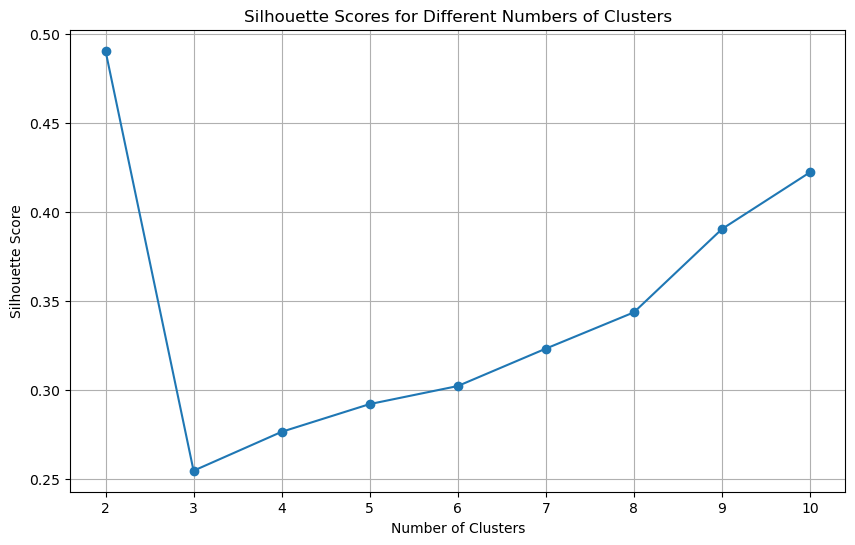

In [27]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [28]:
# Get optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [29]:
# Apply KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels

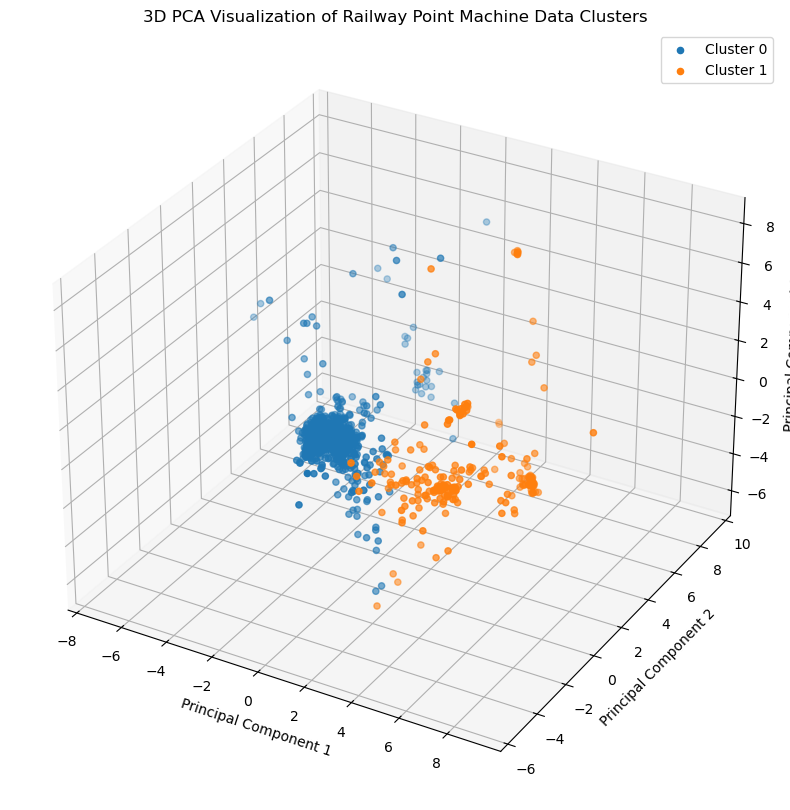

In [30]:
# Visualize the clusters in 3D using PCA components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for cluster in range(optimal_clusters):
    # Filter points belonging to this cluster
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(
        cluster_points['PC1'], 
        cluster_points['PC2'], 
        cluster_points['PC3'],
        label=f'Cluster {cluster}'
    )

ax.set_title('3D PCA Visualization of Railway Point Machine Data Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

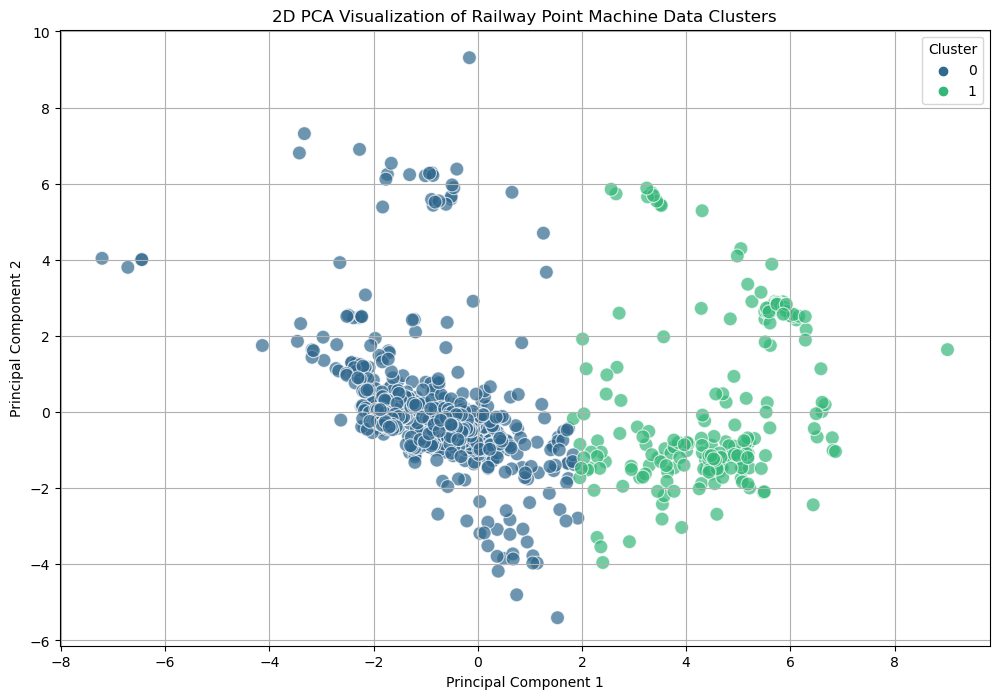

In [31]:
# 2D PCA plot colored by cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    palette='viridis', 
    data=pca_df,
    s=100,
    alpha=0.7
)
plt.title('2D PCA Visualization of Railway Point Machine Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

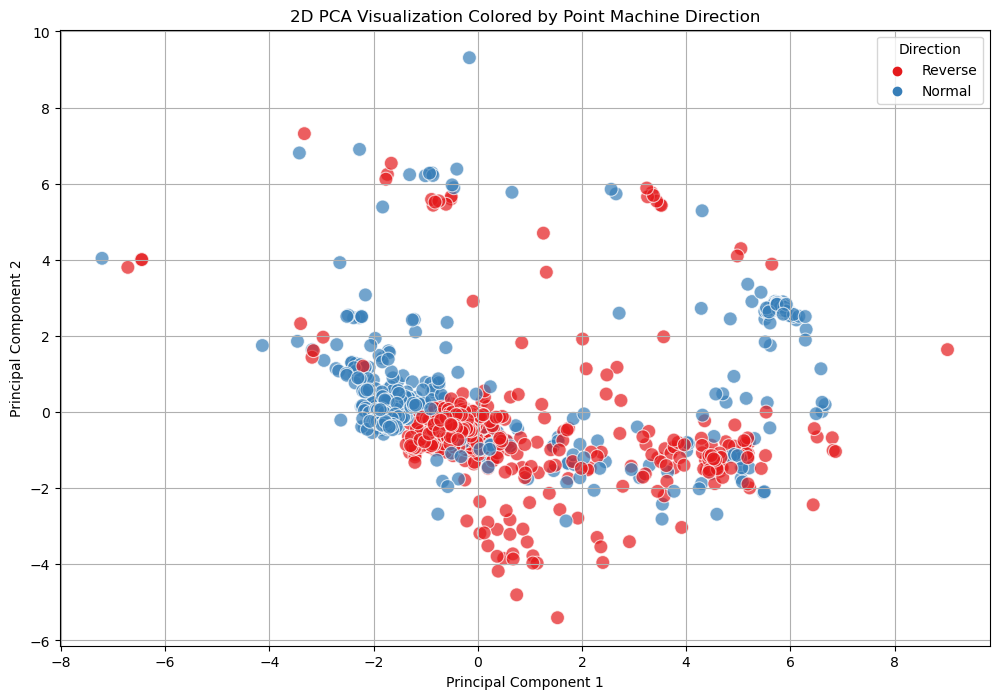

In [32]:
# 2D PCA plot colored by direction
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Direction', 
    palette='Set1', 
    data=pca_df,
    s=100,
    alpha=0.7
)
plt.title('2D PCA Visualization Colored by Point Machine Direction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Direction')
plt.show()

Showing representative signals for Cluster 0


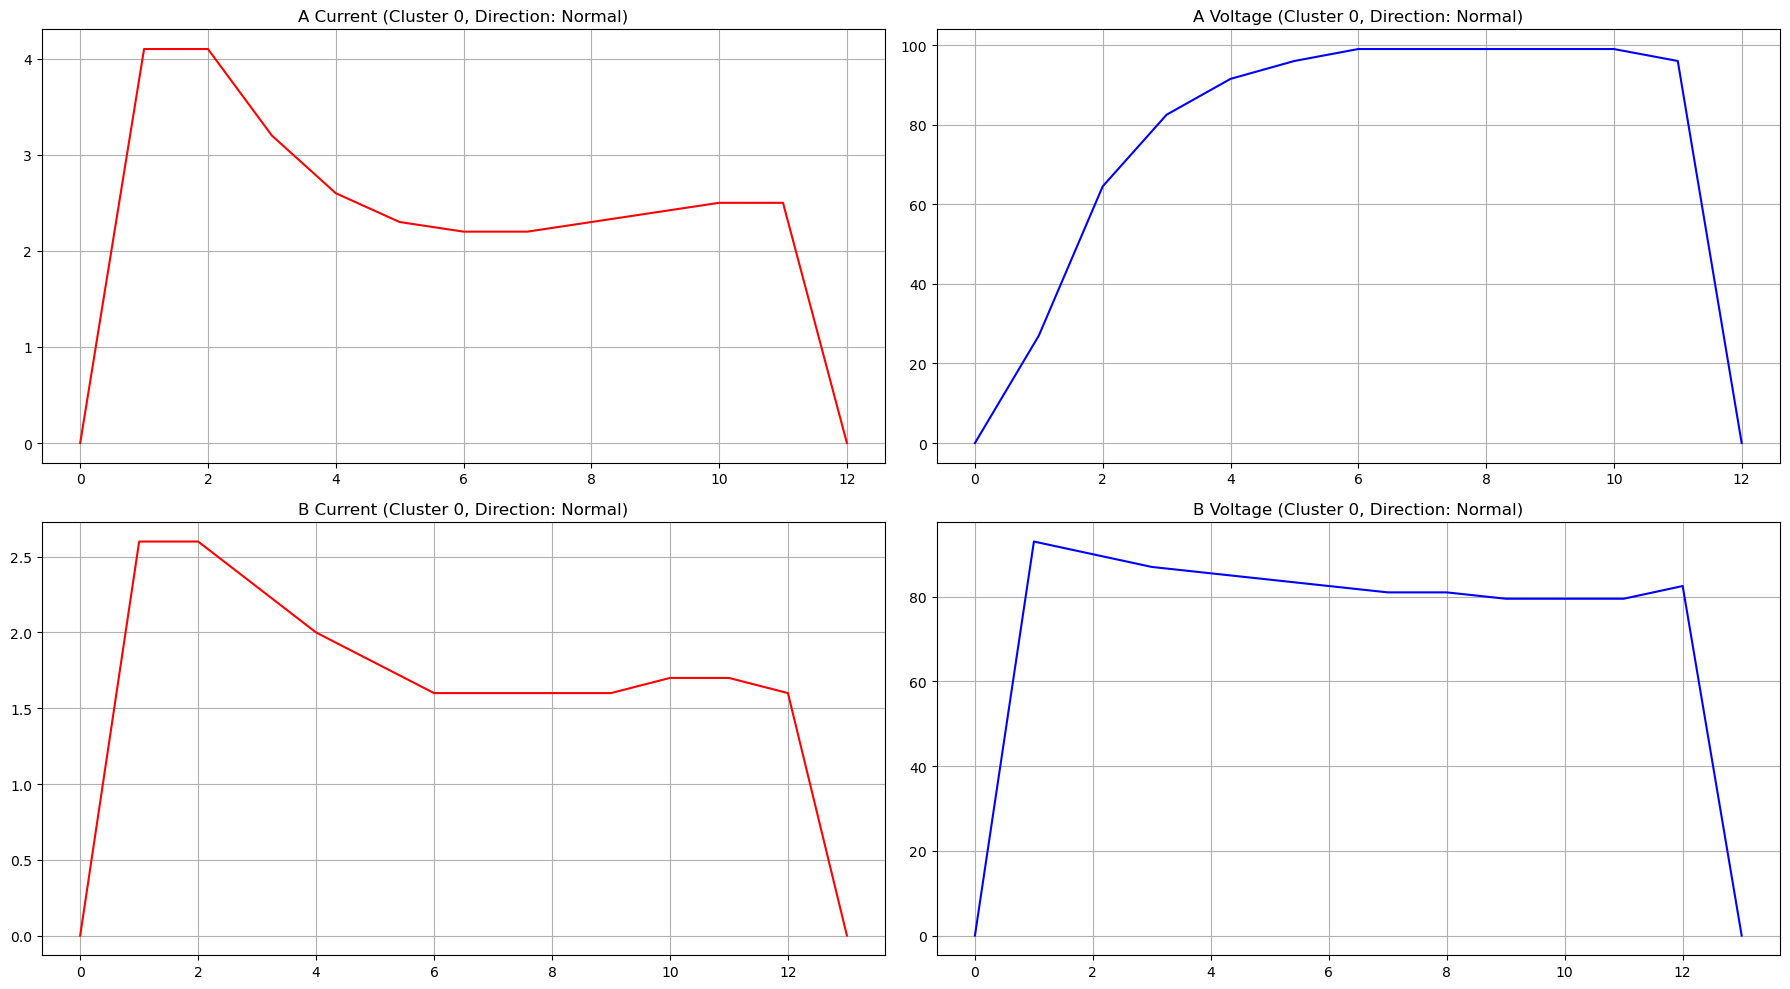

Showing representative signals for Cluster 1


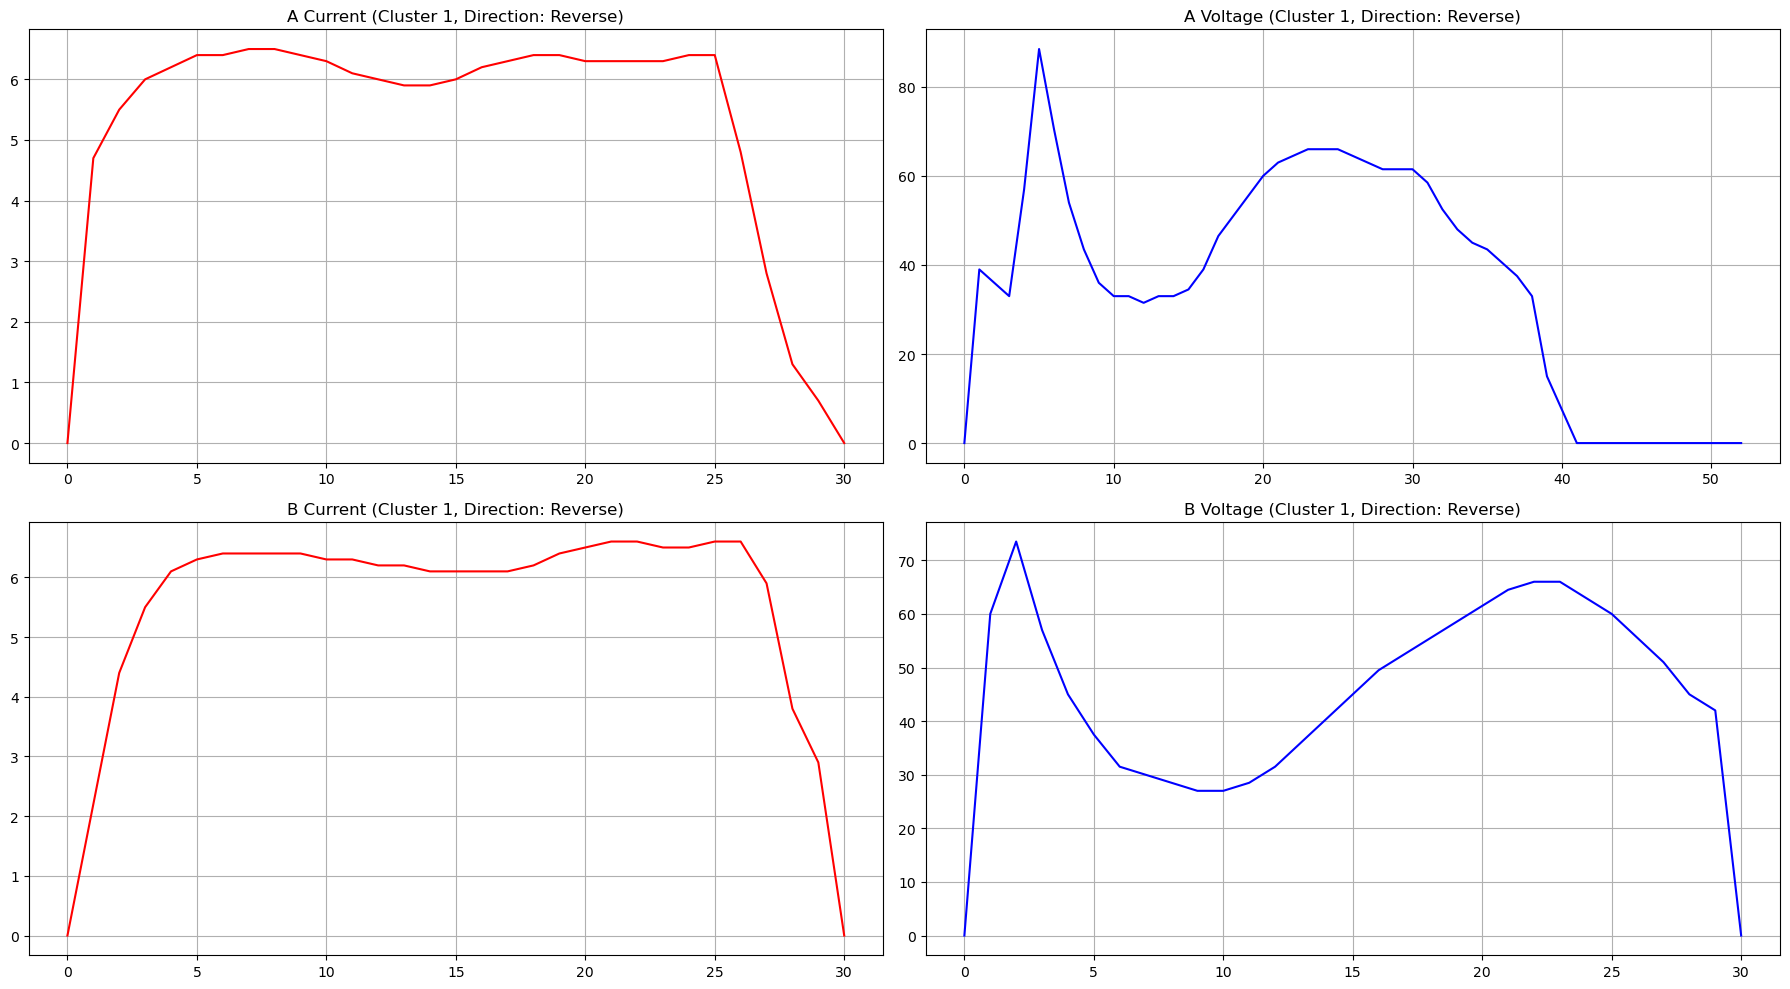

In [33]:
# Function to plot representative signals for a given cluster
def plot_cluster_signals(cluster_number, num_samples=1):
    # Get samples from the cluster
    cluster_samples = df[df['Cluster'] == cluster_number].sample(num_samples)
    
    for idx, (_, sample) in enumerate(cluster_samples.iterrows()):
        fig, axs = plt.subplots(2, 2, figsize=(18, 10))
        
        # Plot A Current
        axs[0, 0].plot(sample['A Current'], 'r-')
        axs[0, 0].set_title(f"A Current (Cluster {cluster_number}, Direction: {sample['Direction']})")
        axs[0, 0].grid(True)
        
        # Plot A Voltage
        axs[0, 1].plot(sample['A Voltage'], 'b-')
        axs[0, 1].set_title(f"A Voltage (Cluster {cluster_number}, Direction: {sample['Direction']})")
        axs[0, 1].grid(True)
        
        # Plot B Current
        axs[1, 0].plot(sample['B Current'], 'r-')
        axs[1, 0].set_title(f"B Current (Cluster {cluster_number}, Direction: {sample['Direction']})")
        axs[1, 0].grid(True)
        
        # Plot B Voltage
        axs[1, 1].plot(sample['B Voltage'], 'b-')
        axs[1, 1].set_title(f"B Voltage (Cluster {cluster_number}, Direction: {sample['Direction']})")
        axs[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()

# Plot representative signals for each cluster
for cluster in range(optimal_clusters):
    print(f"Showing representative signals for Cluster {cluster}")
    plot_cluster_signals(cluster)

<Figure size 1400x600 with 0 Axes>

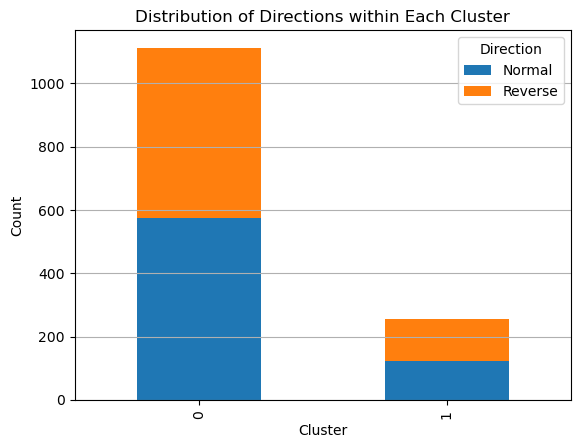

In [34]:
# Visualize cluster distributions by direction
plt.figure(figsize=(14, 6))
cluster_direction_counts = pd.crosstab(df['Cluster'], df['Direction'])
cluster_direction_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Directions within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.legend(title='Direction')
plt.show()

In [35]:
# DBSCAN clustering as an alternative
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Add DBSCAN labels to PCA DataFrame
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Count the number of clusters (excluding noise points marked as -1)
num_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters identified by DBSCAN: {num_dbscan_clusters}")
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")

Number of clusters identified by DBSCAN: 5
Number of noise points: 39


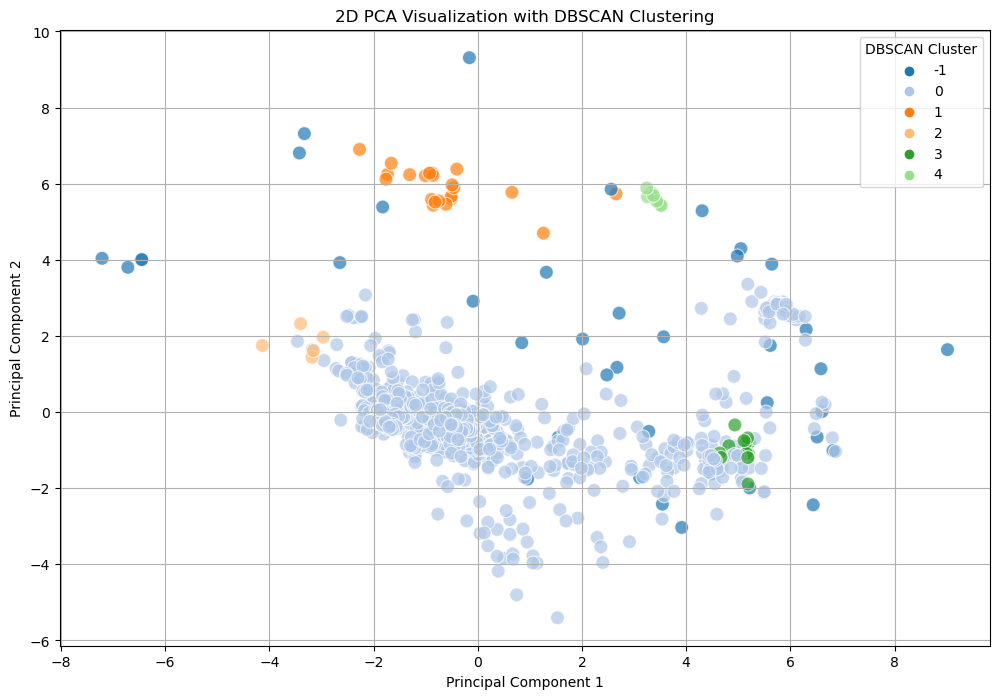

In [36]:
# 2D PCA plot colored by DBSCAN cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='DBSCAN_Cluster', 
    palette='tab20', 
    data=pca_df,
    s=100,
    alpha=0.7
)
plt.title('2D PCA Visualization with DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='DBSCAN Cluster')
plt.show()

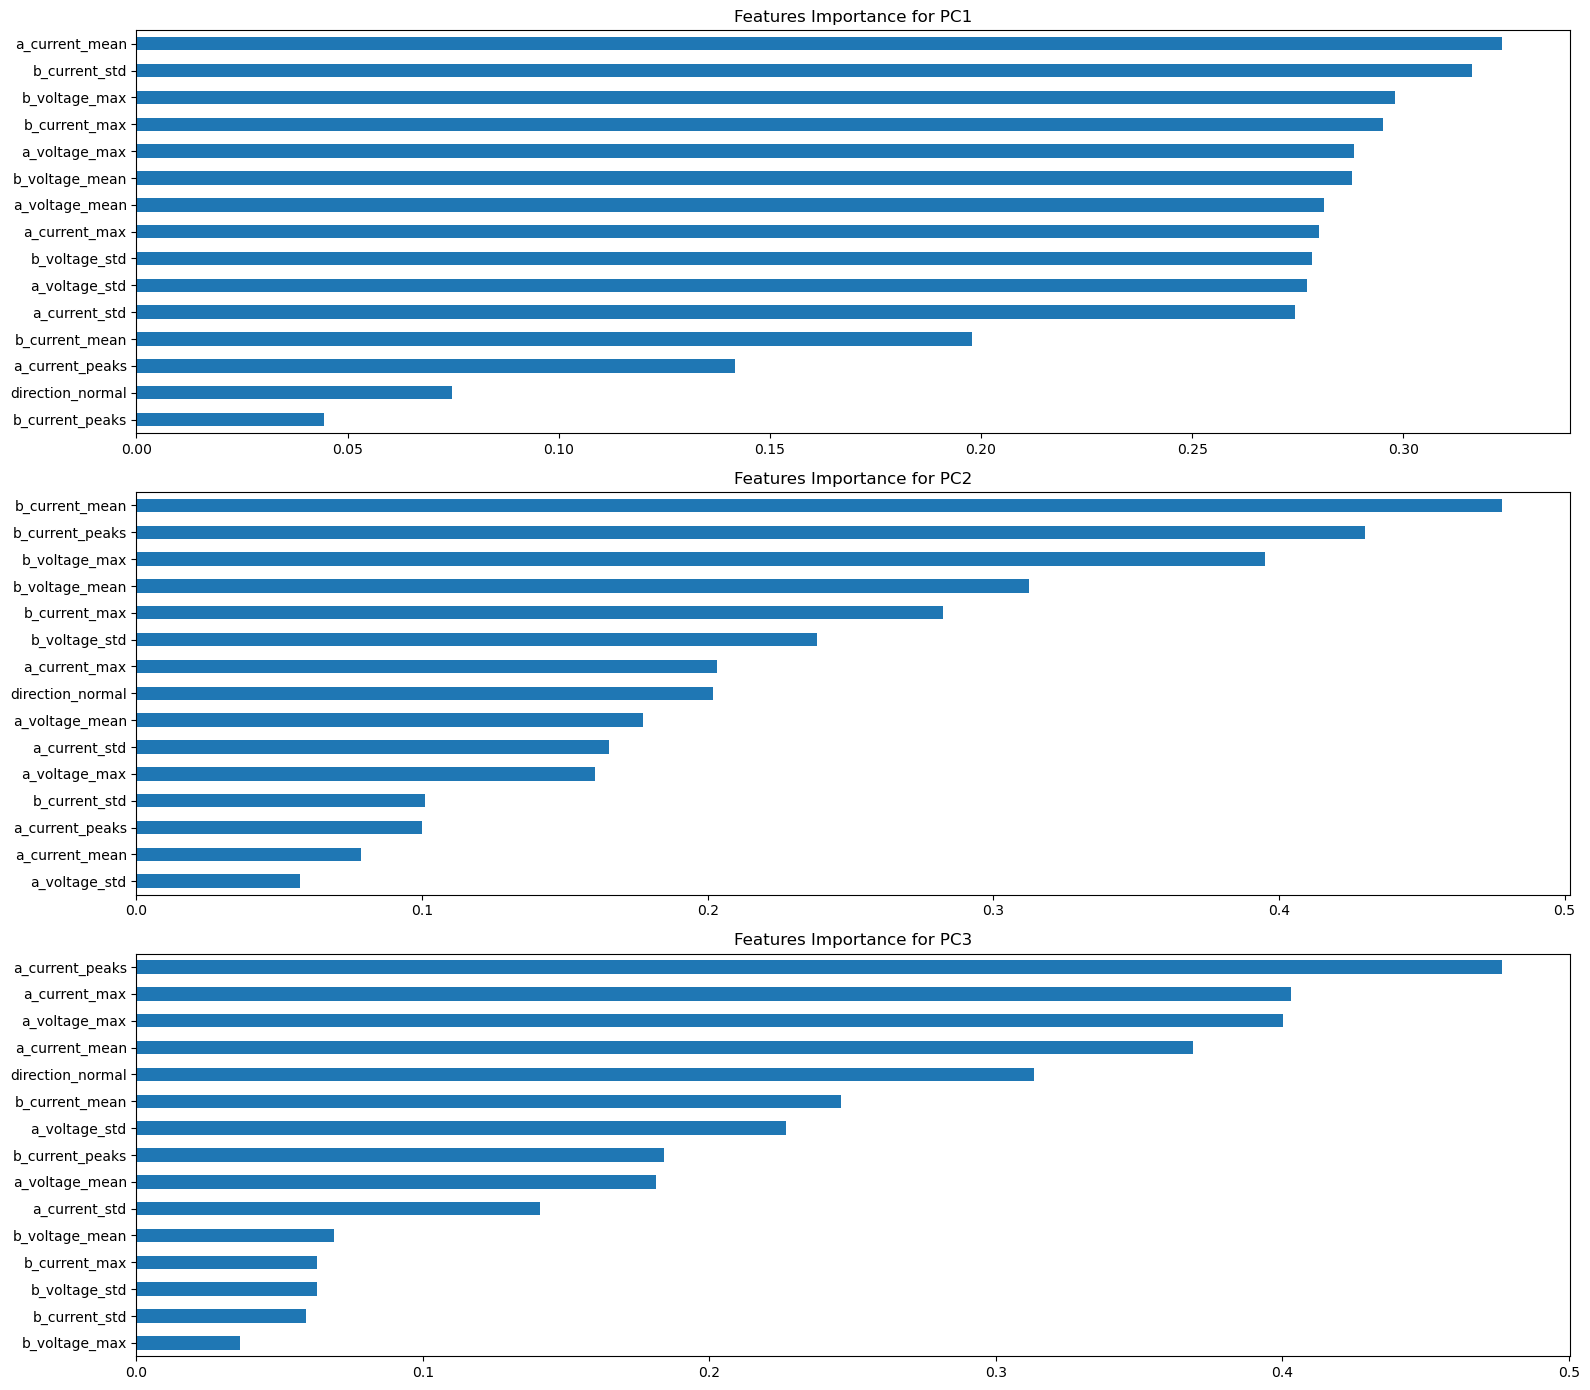

In [38]:
# Feature importance analysis
feature_importance = pd.DataFrame(
    abs(pca.components_),
    columns=features_df.columns,
    index=['PC1', 'PC2', 'PC3']
)
# Plot top features contributing to each principal component
plt.figure(figsize=(16, 14))

for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    plt.subplot(3, 1, i+1)
    feature_importance.loc[pc].sort_values().plot(kind='barh')
    plt.title(f'Features Importance for {pc}')
    plt.tight_layout()

plt.show()


In [ ]:
# # Save the processed dataframe with cluster labels for future use
# df.to_csv('WCR_tws_processed_with_clusters.csv', index=False)

print("Data processing and clustering complete. Results saved to 'WCR_tws_processed_with_clusters.csv'")

Data processing and clustering complete. Results saved to 'WCR_tws_processed_with_clusters.csv'
